['En Fs Fsp Grt Qz Rt' 'En Fsp Fsp Fsp Grt Qz Rt'
 'En Fsp Fsp Grt Ky Qz Rt' 'En Fsp Fsp Grt Qz Rt' 'En Fsp Grt Jd Ky Qz Rt'
 'En Fsp Grt Jd Qz Rt' 'En Fsp Grt Qz Rt']
dict_keys(['En Fs Fsp Grt Qz Rt', 'En Fsp Fsp Fsp Grt Qz Rt', 'En Fsp Fsp Grt Ky Qz Rt', 'En Fsp Fsp Grt Qz Rt', 'En Fsp Grt Jd Ky Qz Rt', 'En Fsp Grt Jd Qz Rt', 'En Fsp Grt Qz Rt'])


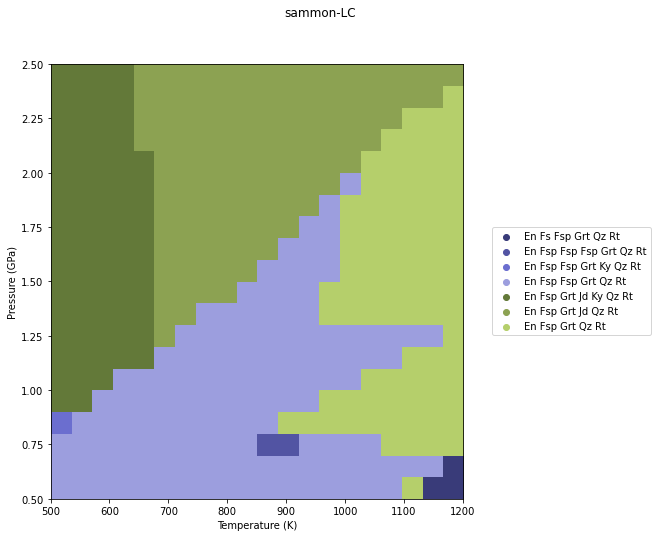

In [26]:
import berman_phase_diagram
from thermoengine.const import units
import numpy as np

Tmin = 500
Tmax = 1200
nT = 20

Pmin = 0.5*units.GPA
Pmax = 2.5*units.GPA
nP = 20

T = np.linspace(Tmin,Tmax,nT)
P = np.linspace(Pmin,Pmax,nP)
name = "sammon-LC"
Ts, Ps, assemblages = berman_phase_diagram.run(
    name=name,
    T=T,
    P=P,
    phase_symbols=[
        "Qz",
        "Rt",
        "Grt",
        "Jd","Fs","En",# "Cpx", "Opx"
        "Ky","Fsp",#"Ab", "An", "Mc", 
    ],
    oxides={
        "SiO2"  :  53.3,
        "TiO2"  :  0.98,
        "Al2O3" :  17.2,
        "FeO"   :  7.12,
        "MnO"   :  0.16,
        "MgO"   :  7.63,
        "CaO"   : 10.15,
        "Na2O"  :  2.63,
        "K2O"   :  0.70,
    #   "P2O5"  :  0.16,
    }
)


['En Fs Fsp Grt Qz Rt' 'En Fsp Fsp Fsp Grt Qz Rt'
 'En Fsp Fsp Grt Ky Qz Rt' 'En Fsp Fsp Grt Qz Rt' 'En Fsp Grt Jd Ky Qz Rt'
 'En Fsp Grt Jd Qz Rt' 'En Fsp Grt Qz Rt']
dict_keys(['En Fs Fsp Grt Qz Rt', 'En Fsp Fsp Fsp Grt Qz Rt', 'En Fsp Fsp Grt Ky Qz Rt', 'En Fsp Fsp Grt Qz Rt', 'En Fsp Grt Jd Ky Qz Rt', 'En Fsp Grt Jd Qz Rt', 'En Fsp Grt Qz Rt'])


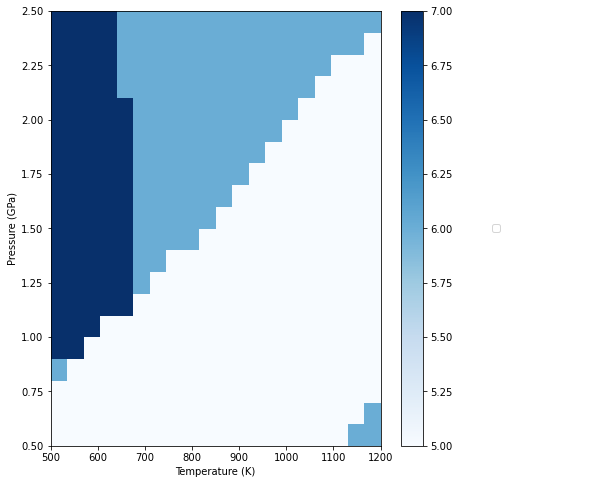

In [46]:
import matplotlib.pyplot as plt
def plot_result(Ts,Ps,assemblages,name):
    
    get_hash = lambda assemblage : " ".join(sorted(assemblage.names[assemblage.amounts>0.001]))
    comps = np.vectorize(get_hash)(assemblages)

    get_n_phases = lambda assemblage : assemblage.unique_phase_names.size
    n_phases = np.vectorize(get_n_phases)(assemblages)

    Tmin = np.amin(Ts)
    Tmax = np.amax(Ts)
    Pmin = np.amin(Ps)
    Pmax = np.amax(Ps)

    categories = np.unique(comps).flatten()
    print(categories)

    colormap = np.vstack((plt.cm.tab20b(np.linspace(0., 1, 20)), plt.cm.tab20c(np.linspace(0, 1, 20))))

    colorLookup = dict([(key, value) for key, value in zip(categories, colormap)])
    print(colorLookup.keys())

    colors = [colorLookup[c] for c in comps.flatten()]

    shape = (comps.shape[0], comps.shape[1], 4)
    colorgrid = np.reshape(colors, shape)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(4,4,(1,7))

    ax1.scatter(Ts.flatten(), Ps.flatten(), c=n_phases.flatten(), cmap="Blues")

    plt.xlim([Tmin,Tmax])
    plt.ylim([Pmin,Pmax])
    plt.ylabel("Pressure (Pa)")


    ax2 = plt.subplot(4,4,(1,15))
    im=ax2.imshow(n_phases, origin='lower', extent=(Tmin,Tmax,Pmin/units.GPA,Pmax/units.GPA), aspect="auto", cmap="Blues")
    plt.ylabel("Pressure (GPa)")
    plt.xlabel("Temperature (K)")
    plt.colorbar(im)
    ax3 = plt.subplot(4,4,(4,16))
    ax3.legend(*ax1.get_legend_handles_labels(), loc='center left')
    ax3.axis('off')
    
    #fig.suptitle(name)
    #plt.savefig(name + "_"+ dt.datetime.now().isoformat() + ".png",facecolor='white', transparent=False)
plot_result(Ts,Ps,assemblages,name)           

Aff = 15.48441185808042
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200000  0.000000  0.100000  0.000000  0.00
Ab   0.076923  0.00  0.076923  0.230769  0.000000  0.000000  0.000000  0.00
An   0.000000  0.00  0.153846  0.153846  0.000000  0.076923  0.000000  0.00
Rt   0.000000  0.00  0.000000  0.000000  0.000000  0.000000  0.333333  0.00
Mc   0.000000  0.00  0.076923  0.230769  0.076923  0.000000  0.000000  0.00
Grt  0.000000  0.06  0.100000  0.150000  0.000000  0.000000  0.000000  0.09
Grt  0.000000  0.03  0.100000  0.150000  0.000000  0.000000  0.000000  0.12
---
Qz [1.]
Di [1.]
Ab [1.]
An [1.]
Rt [1.]
Mc [1.]
Grt [0.6 0.  0.4]
Grt [0.8 0.  0.2]
Aff = 79.37876322946977
           Na    Mg        Al        Si         K    Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.00  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200

[array([[ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        ...,
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ]]),
 array([[ 5000.        ,  5000.        ,  5000.        , ...,
          5000.        ,  5000.        ,  5000.        ],
        [ 5408.16326531,  5408.16326531,  5408.16326531, ...,
          5408.16326531,  5408.16326531,  5408.16326531],
        [ 5816.32653061,  5816.32653061,  5816.32653061, ...,

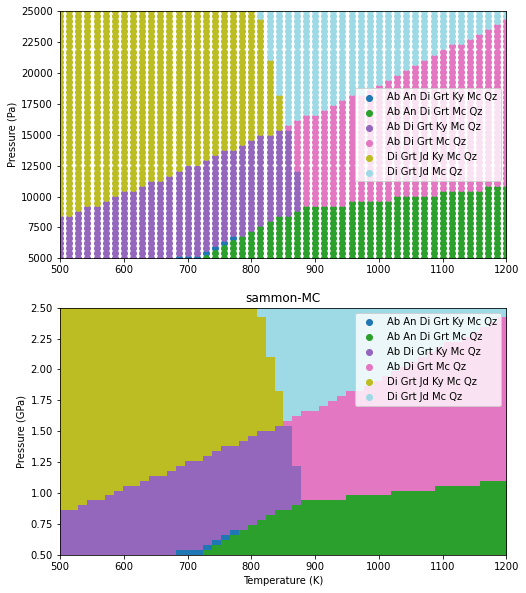

In [ ]:

berman_phase_diagram.run(
    name="sammon-MC",
    T=T,
    P=P,
    oxides={
        "SiO2"  : 62.2,
        "Al2O3" : 16.1, 
        "FeO"   : 5.73,
        "MnO"   : 0.15,
        "TiO2"  : 0.80,
        "MgO"   : 4.03, 
        "CaO"   : 6.20, 
        "Na2O"  : 3.23, 
        "K2O"   : 1.44,
     #   "P2O5"  : 0.15
    }
)


Aff = 9.083989257342182
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200000  0.000000  0.100000  0.000000  0.00
Ab   0.076923  0.00  0.076923  0.230769  0.000000  0.000000  0.000000  0.00
An   0.000000  0.00  0.153846  0.153846  0.000000  0.076923  0.000000  0.00
Rt   0.000000  0.00  0.000000  0.000000  0.000000  0.000000  0.333333  0.00
Mc   0.000000  0.00  0.076923  0.230769  0.076923  0.000000  0.000000  0.00
Grt  0.000000  0.06  0.100000  0.150000  0.000000  0.000000  0.000000  0.09
Grt  0.000000  0.03  0.100000  0.150000  0.000000  0.000000  0.000000  0.12
---
Qz [1.]
Di [1.]
Ab [1.]
An [1.]
Rt [1.]
Mc [1.]
Grt [0.6 0.  0.4]
Grt [0.8 0.  0.2]
Aff = 2.6315751802758314
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
cEn  0.000000  0.20  0.0000

[array([[ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        ...,
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ],
        [ 500.        ,  514.28571429,  528.57142857, ..., 1171.42857143,
         1185.71428571, 1200.        ]]),
 array([[ 5000.        ,  5000.        ,  5000.        , ...,
          5000.        ,  5000.        ,  5000.        ],
        [ 5408.16326531,  5408.16326531,  5408.16326531, ...,
          5408.16326531,  5408.16326531,  5408.16326531],
        [ 5816.32653061,  5816.32653061,  5816.32653061, ...,

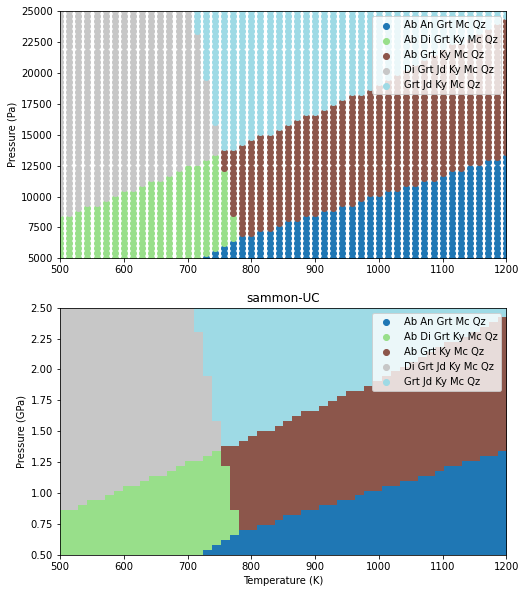

In [ ]:

berman_phase_diagram.run(
    name="sammon-UC",
    T=T,
    P=P,
    oxides={
        "SiO2"  : 68.0,
        "TiO2"  : 0.66,
        "Al2O3" : 15.1, 
        "FeO"   : 5.21,
        "MnO"   : 0.10, 
        "MgO"   : 2.29, 
        "CaO"   : 2.75, 
        "Na2O"  : 2.63, 
        "K2O"   : 3.11,
      #  "P2O5"  : 0.17,
    }
)

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
#from __future__ import annotations # Enable Python 4 type hints in Python 3
from thermoengine.equilibrate import PhaseLibrary, GibbsMinimizer, System
import thermoengine as thermo
from thermoengine.const import units
from thermoengine.core import UnorderedList
import os
import contextlib
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
import matplotlib.colors as mcolors
import thermoengine as thermo

Tmin = 500
Tmax = 1200
nT = 2

Pmin = 0.5*units.GPA
Pmax = 2.5*units.GPA
nP = 2

T = np.linspace(Tmin,Tmax,nT)
P = np.linspace(Pmin,Pmax,nP)

phase_symbols_berman = [
    "Qz", "Coe",
    "Grt",  
    'Di','Jd','cEn', #'Cpx'
    'En', 'Fs',
    "Ky",
    "Ab", "An",
    "Rt",
    "Mc"
]

oxides={
        "SiO2"  : 68.0,
        "TiO2"  : 0.66,
        "Al2O3" : 15.1, 
        "FeO"   : 5.21,
        "MnO"   : 0.10, 
        "MgO"   : 2.29, 
        "CaO"   : 2.75, 
        "Na2O"  : 2.63, 
        "K2O"   : 3.11,
        "P2O5"  : 0.17,
    }

Tmin = np.amin(T)
Tmax = np.amax(T)
Pmin = np.amin(P)
Pmax = np.amax(P)

oxide_comp = thermo.OxideWtComp(**oxides)

db = thermo.model.Database(database='Berman')
phases = db.get_phases(phase_symbols_berman)
phase_library = PhaseLibrary(phases)

system = System(
    T=800,
    P=0.25*units.GPA,
    comp=oxide_comp,
    options={'grid_spacing':0.2},
    phase_library=phase_library,
    affinity_thresh=1000.
)

Aff = 9.086573071079329
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
Di   0.000000  0.10  0.000000  0.200000  0.000000  0.100000  0.000000  0.00
Ab   0.076923  0.00  0.076923  0.230769  0.000000  0.000000  0.000000  0.00
An   0.000000  0.00  0.153846  0.153846  0.000000  0.076923  0.000000  0.00
Rt   0.000000  0.00  0.000000  0.000000  0.000000  0.000000  0.333333  0.00
Mc   0.000000  0.00  0.076923  0.230769  0.076923  0.000000  0.000000  0.00
Grt  0.000000  0.06  0.100000  0.150000  0.000000  0.000000  0.000000  0.09
Grt  0.000000  0.03  0.100000  0.150000  0.000000  0.000000  0.000000  0.12
---
Qz [1.]
Di [1.]
Ab [1.]
An [1.]
Rt [1.]
Mc [1.]
Grt [0.6 0.  0.4]
Grt [0.8 0.  0.2]
Aff = 2.632336519891396
           Na    Mg        Al        Si         K        Ca        Ti    Fe
Qz   0.000000  0.00  0.000000  0.333333  0.000000  0.000000  0.000000  0.00
cEn  0.000000  0.20  0.00000

array(['Ab', 'An', 'Grt', 'Mc', 'Qz', 'Rt', 'cEn'], dtype='<U3')

1000